<a href="https://colab.research.google.com/github/Mike030668/Base_Fool_images/blob/master/play_fool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prolect
!git clone https://github.com/Mike030668/Base_Fool_images.git -q

In [2]:
import sys
dir_project = '/content/Base_Fool_images'
sys.path.append(dir_project)
from scripts.consruct_game import Durack

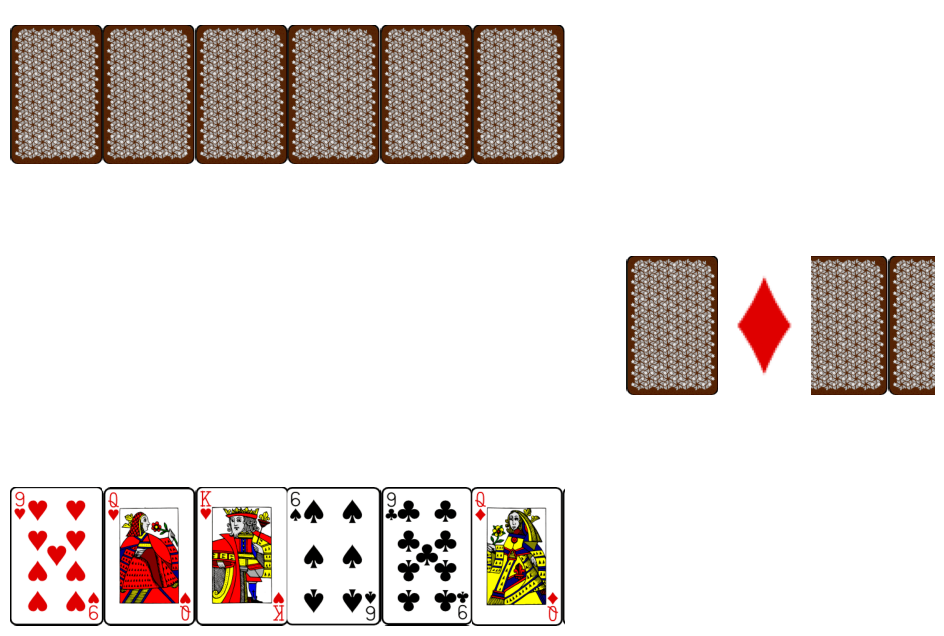

type_player human

Your move, Human_1
Player Human_1, your move, you have 2 attempts left
Enter card number or zero to skip: stop
Player Human_1 stopped the game
Player Human_1 skipped the move


Victory for 

Checking cards
Robot_1(rand)
          6  7  8  9  10  jack  queen  king  ace
hearts    6  0  8  0   0    11      0     0    0
spades    0  0  0  9  10     0      0     0    0
clubs     0  0  0  0   0     0      0    13    0
diamonds  0  0  0  0   0     0      0     0    0

Human_1
          6  7  8  9  10  jack  queen  king  ace
hearts    0  0  0  9   0     0     12    13    0
spades    6  0  0  0   0     0      0     0    0
clubs     0  0  0  9   0     0      0     0    0
diamonds  0  0  0  0   0     0   1200     0    0

Checking other fields
Discard Pile
          6  7    8    9  10  jack  queen  king   ace
hearts    0  0    0    0   0     0      0     0     0
spades    0  0    8    0   0     0      0     0    14
clubs     0  0    0    0   0     0     12     0     0
diamonds  

In [7]:
game = Durack(cards4player=6, img_path="Base_Fool_images/images")
players, playdeck, trump = game.init_game()
game.game_process.go_game(players, playdeck, trump)